In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

import maria

array      = maria.get_array("default", field_of_view=1., primary_size=5.)
daisy_scan = maria.get_pointing("daisy", integration_time=600, scan_radius=0)
apex_site  = maria.get_site("APEX")

sls = maria.atmosphere.SingleLayerSimulation(array, daisy_scan, apex_site, verbose=True)

self.angular_resolution = 0.0010188016189049487


NameError: name 'weathergen' is not defined

In [2]:
sls.weather

NameError: name 'sls' is not defined

In [2]:
#import pandas as pd
#pd.options.display.float_format = '{:.3e}'.format

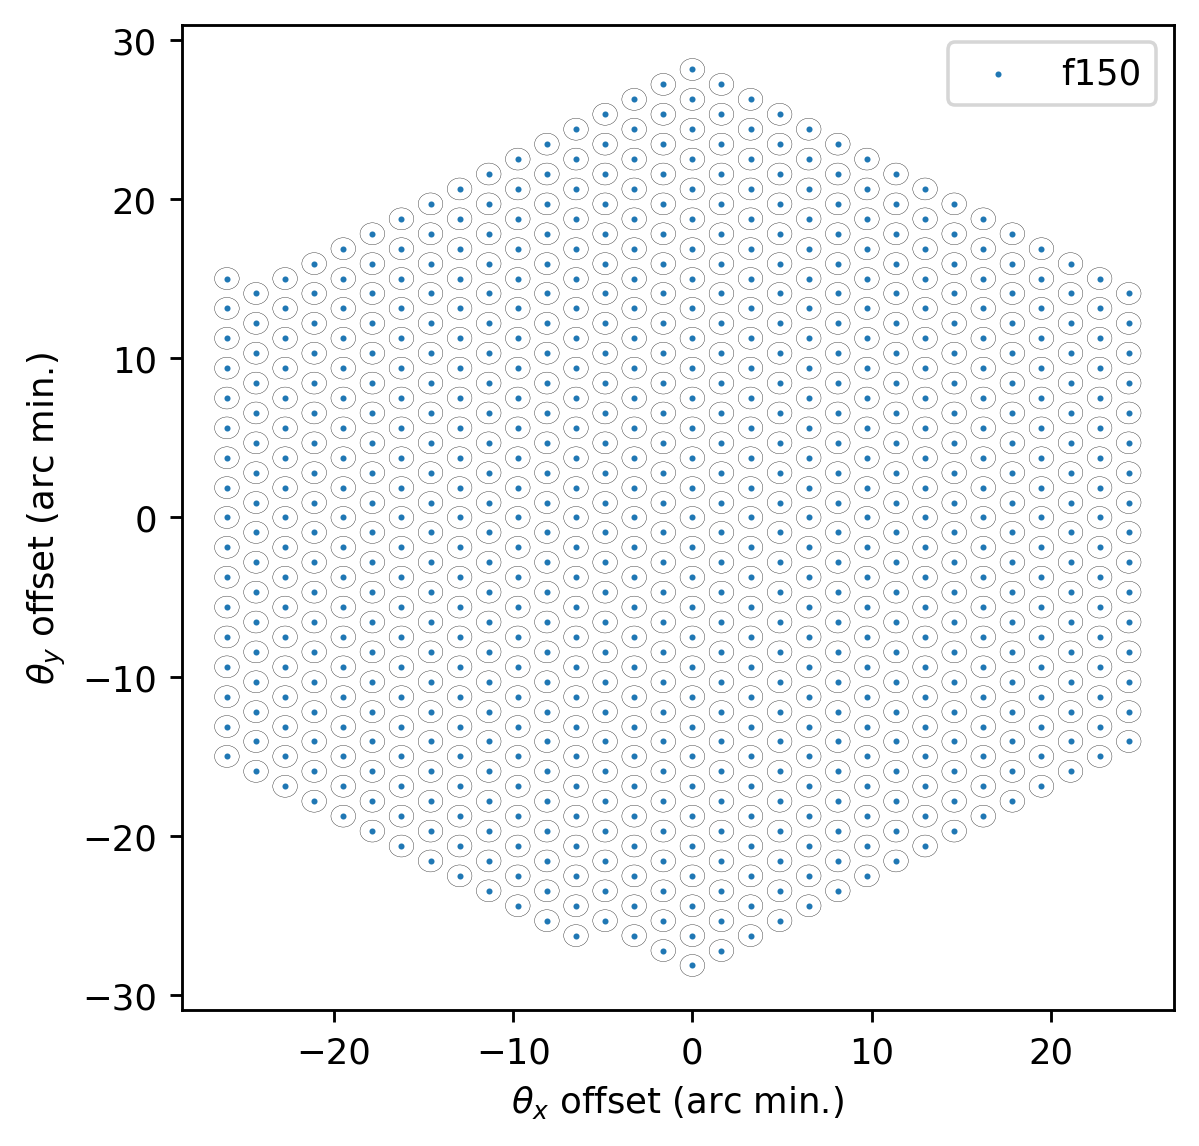

In [4]:
array.plot_dets()

In [5]:
#array.dets.loc[:, "offset_x"] = array.dets.loc[:, "offset_x"].astype(float)
#array.dets.dtypes

In [6]:
%time tod = sls.run()

Generating atmosphere: 100%|███████████████████████████████████████████████████████████████████████| 362/362 [00:00<00:00, 54528.21it/s]


CPU times: user 2.97 s, sys: 675 ms, total: 3.64 s
Wall time: 3.75 s


In [7]:
self = sls

from maria import utils

trans_detector_angular_positions = (self.detector_offsets[:, None] + self.boresight_angular_position[None]) @ self.R.T
detector_values = np.zeros(trans_detector_angular_positions.shape[:-1])
for uband in self.array.ubands:
    band_mask = self.array.dets.band == uband
    band_angular_fwhm = self.angular_beam_fwhm[band_mask].mean()
    F = utils.beam.make_beam_filter(band_angular_fwhm, self.angular_resolution, self.array.beam_profile)
    FILTERED_VALUES = utils.beam.separably_filter(self.VALUES, F) 
    detector_values[band_mask] = sp.interpolate.RegularGridInterpolator((self.cross_section_side, self.extrusion_side), 
                                                                        FILTERED_VALUES.T)(trans_detector_angular_positions[band_mask])

In [7]:
plt.plot(detector_values[0])

NameError: name 'detector_values' is not defined

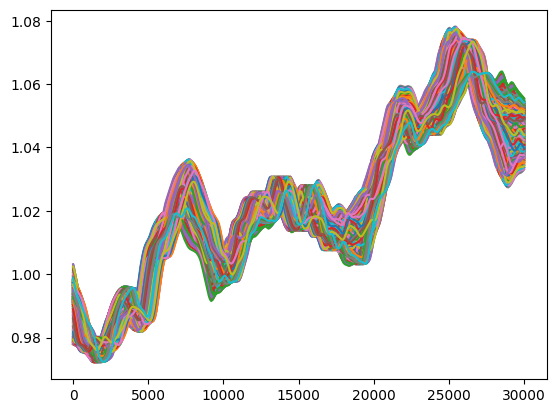

In [9]:
plt.plot(sls.effective_integrated_water_vapor.T)
plt.show()

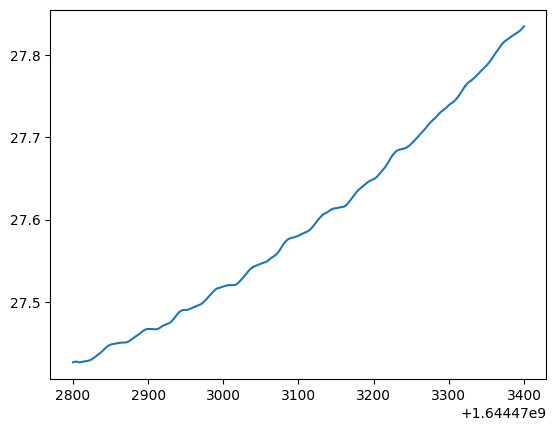

In [40]:
plt.plot(tod.time, tod.data.mean(axis=0))

In [41]:
from maria.utils.functions import normalized_matern

def approximate_normalized_matern(r, nu, n_test_points=256):
    """
    Computing BesselK[nu,z] for arbitrary nu is expensive. This is good for casting over huge matrices.
    """
    
    r_safe = np.atleast_1d(np.abs(r))
    r_min = r_safe[r_safe > 0].min()
    r_max = r_safe.max()         
    
    test_values = np.r_[0, np.geomspace(r_min, r_max, n_test_points-1)]
    data_values = normalized_matern(test_values, nu) * np.exp(test_values)
    
    return np.interp(r_safe, test_values, data_values) * np.exp(-r_safe)


In [57]:
sls.angular_outer_scale

0.34845281138730605

In [58]:
self.effective_integrated_water_vapor.min()

0.8902643169898329

In [59]:
plt.plot(passband.T)
plt.show()

NameError: name 'passband' is not defined

In [60]:
passband @ self.site.spectrum.trj

NameError: name 'passband' is not defined

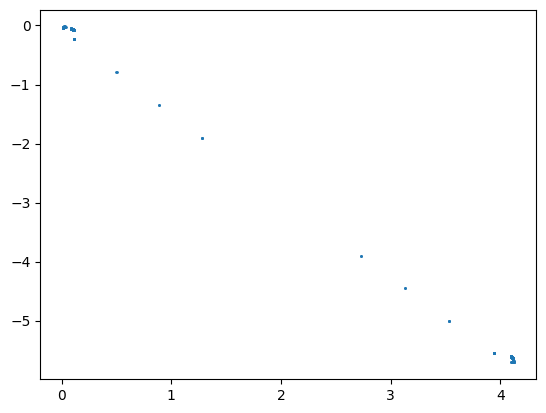

In [62]:
plt.scatter(*sls.atmosphere_hull_points.T, s=1)

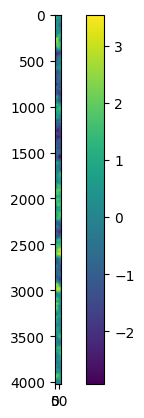

In [64]:
plt.imshow(sls.VALUES[:20000])
plt.colorbar()

In [31]:
self.boresight_angular_position.shape

(30000, 2)

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    4,    4,
          4,    4,    4,    4,    4,    4,    8,    8,    8,    8,   16,
         16,   32,   32,   64,   64,  128,  128,  256,  256,  512,  512,
       1024, 1024, 2048, 2048, 4022, 4022])

In [71]:
#plt.scatter(self.TRANS_POINTS[self.extrusion_sample_index, 0], self.TRANS_POINTS[self.extrusion_sample_index, 1], s=1)

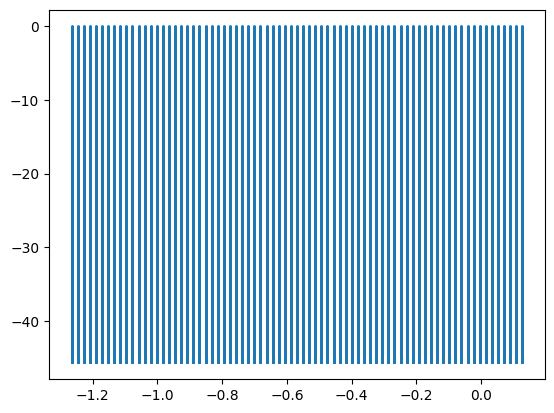

In [65]:
plt.scatter(self.TRANS_POINTS[..., 0], self.TRANS_POINTS[..., 1], s=1)

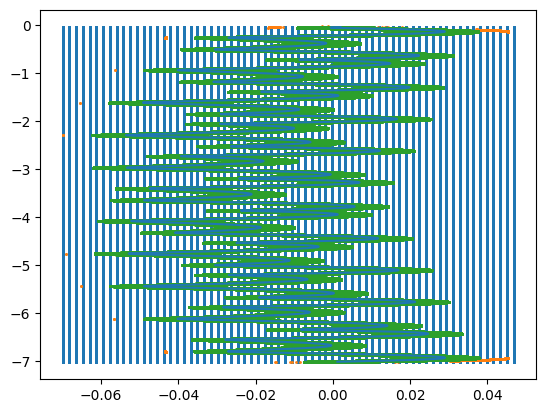

In [66]:
self = sls

trans_boresight_angular_position = self.boresight_angular_position @ self.R.T
trans_points = self.atmosphere_hull_points @ self.R.T

trans_detector_angular_positions = (self.detector_offsets[:, None] + self.boresight_angular_position[None]) @ self.R.T
detector_values = sp.interpolate.RegularGridInterpolator((self.cross_section_side, self.extrusion_side), self.VALUES.T)(trans_detector_angular_positions)

plt.plot(trans_boresight_angular_position[:,0], trans_boresight_angular_position[:,1])
plt.scatter(self.TRANS_POINTS[..., 0], self.TRANS_POINTS[..., 1], s=1)
plt.scatter(trans_points[..., 0], trans_points[..., 1], s=1)
plt.scatter(trans_detector_angular_positions[..., 0], trans_detector_angular_positions[..., 1], s=1)

#plt.ylim(-8, -7)

In [61]:
trans_detector_angular_positions.min(axis=(0, 1))

array([-0.09698796, -7.05938459])

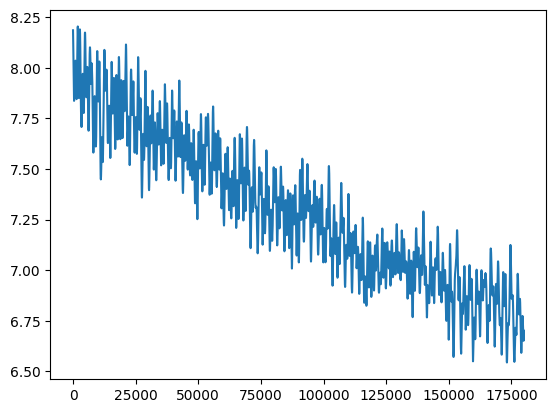

In [21]:
plt.plot(tod.data[2])

In [36]:
self = sls

detector_offsets = np.c_[self.array.sky_x, self.array.sky_y]





In [ ]:
self.boresight_angular_position

In [ ]:
def generate_turbulence):
    

In [21]:
self.VALUES

array([[ 0.25565387,  0.31047088,  0.40684272, ...,  1.1665359 ,
         1.10400757,  1.02390498],
       [ 0.25091871,  0.35430551,  0.36074685, ...,  1.14901612,
         1.07374584,  1.07130228],
       [ 0.28952031,  0.36427959,  0.43307614, ...,  1.12223507,
         1.11134365,  1.04616297],
       ...,
       [ 1.1565091 ,  1.20721716,  1.1809836 , ..., -0.256901  ,
        -0.26527134, -0.31400174],
       [ 1.14410604,  1.12309615,  1.11750721, ..., -0.12871054,
        -0.1663718 , -0.19954952],
       [ 1.17654009,  1.18497294,  1.13280141, ..., -0.0943551 ,
        -0.11227596, -0.13610998]])

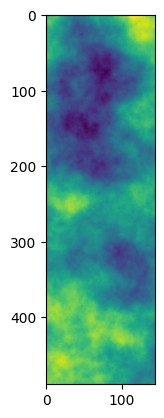

In [23]:
plt.imshow(self.VALUES)

In [439]:
%timeit timestep()

155 ns ± 0.922 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


144
72
36
18
9
5
5
5
5
5
5


In [ ]:
live_edge_cross_section = cross_section_side
live_edge_extrusion = np.repeat(extrusion_min - self.min_ang_res, n_cross_section)

sample_cross_section = CROSS_SECTION[self.extrusion_sample_index, self.cross_section_sample_index]
sample_extrusion = EXTRUSION[self.extrusion_sample_index, self.cross_section_sample_index]

n_live_edge = len(live_edge_extrusion)
n_sample = len(sample_extrusion)

R00 = np.sqrt(np.subtract.outer(X0, X0) ** 2 + np.subtract.outer(Y0, Y0) ** 2)
R01 = np.sqrt(np.subtract.outer(X1, X0) ** 2 + np.subtract.outer(Y1, Y0) ** 2)
R11 = np.sqrt(np.subtract.outer(X1, X1) ** 2 + np.subtract.outer(Y1, Y1) ** 2)

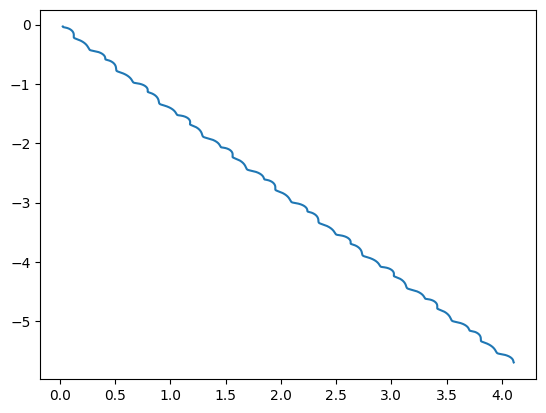

array([0.        , 0.00171485, 0.0034297 , ..., 0.        , 0.06173454,
       0.        ])

In [307]:
matern?

Signature: matern(r, r0, nu)
Docstring: Matern covariance
File:      ~/src/maria/maria/utils/functions.py
Type:      function

In [381]:
for i in range(100):
    new_values = 
    yield np.r_[new_values[None], VALUES[:-1]]

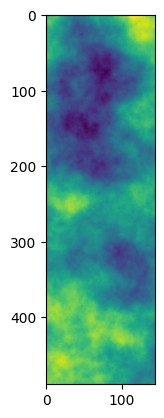

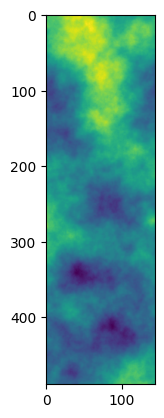

In [382]:
plt.imshow(VALUES)

In [369]:
VALUES[:-1].shape

(488, 144)

In [315]:
matern(np.sqrt(np.square(sample_positions[suj] - sample_positions[sui]).sum(axis=1)), outer_scale, 5/6)

array([0.99831552, 0.99501549, 0.99070257, ..., 0.71701082, 0.44527545,
       0.71701082])

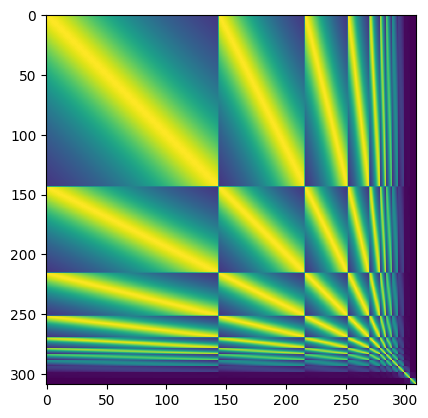

In [317]:
plt.imshow(C00)

(-0.8, -0.7)

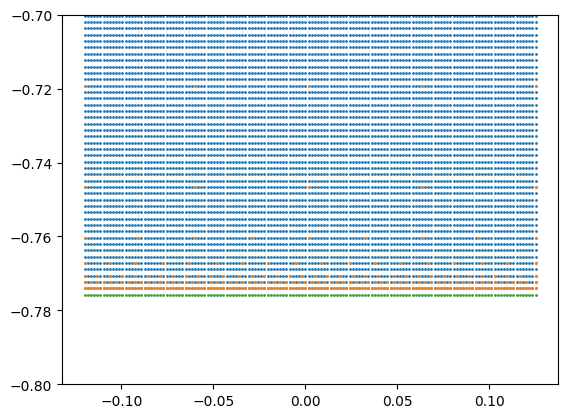

In [291]:
live_edge_cross_section = cross_section_side
live_edge_extrusion = np.repeat(extrusion_min - self.min_ang_res, n_cross_section)

sample_cross_section = CROSS_SECTION[self.extrusion_sample_index, self.cross_section_sample_index]
sample_extrusion = EXTRUSION[self.extrusion_sample_index, self.cross_section_sample_index]

n_live_edge = len(live_edge_extrusion)
n_sample = len(sample_extrusion)

plt.scatter(CROSS_SECTION, EXTRUSION, s=1)
plt.scatter(CROSS_SECTION[self.extrusion_sample_index, self.cross_section_sample_index], 
            EXTRUSION[self.extrusion_sample_index, self.cross_section_sample_index], s=1)
plt.scatter(live_edge_cross_section, live_edge_extrusion, s=1)

plt.ylim(-0.8, -0.7)

In [246]:
#self.cross_section_sample_index

In [231]:
_cross_section_samples

array([  0,   2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,
        37,  40,  43,  46,  49,  52,  55,  58,  61,  64,  67,  70,  72,
        75,  78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 107, 110,
       113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143])

In [ ]:
min_anchor_points_per_row = 1

In [184]:
n_trans_x

143

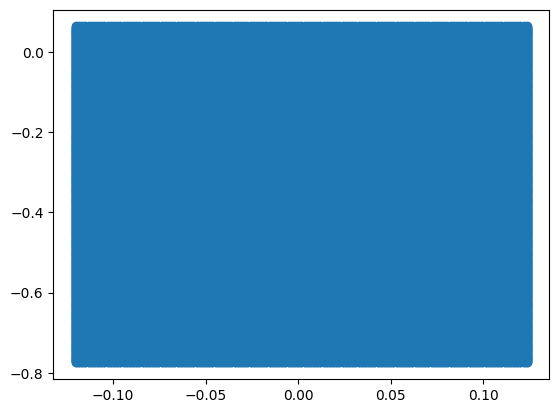

In [185]:
plt.scatter(TRANS_X, TRANS_Y)

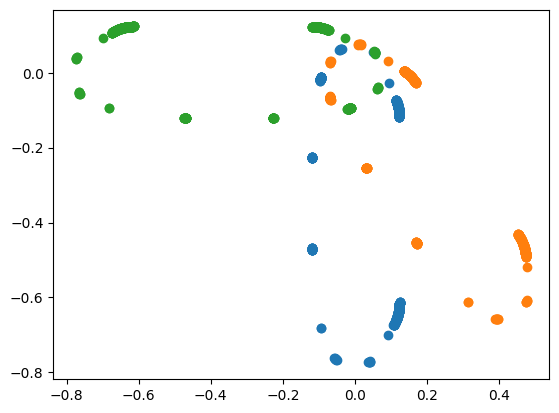

In [155]:
plt.scatter(trans_points[:, 0], trans_points[:, 1])
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(trans_points[:, 1], trans_points[:, 0])

In [ ]:
self.layer_rotation_angles.append(
                utils.get_minimal_bounding_rotation_angle(layer_hull_theta_z.ravel())
            )

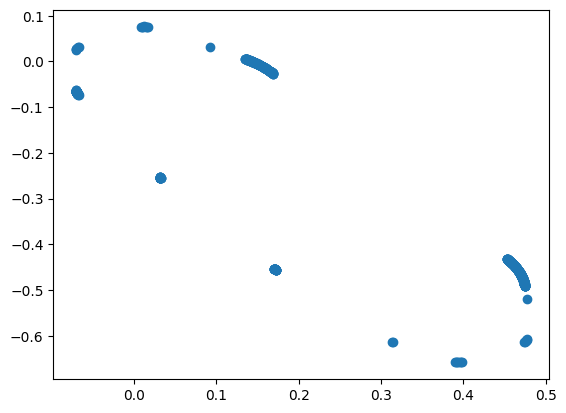

In [53]:
plt.scatter(ahp[:, 0], ahp[:, 1])

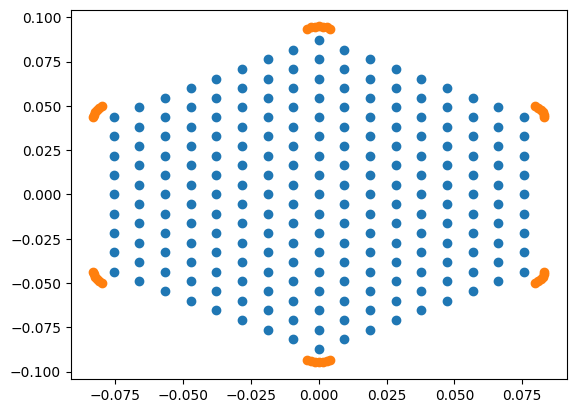

In [25]:
plt.scatter(sls.array.sky_x, sls.array.sky_y)
#plt.plot(*points[hull.vertices].T)
plt.scatter(*padded_doch_offsets[padded_doch.vertices].T)



In [97]:
np.vstack([np.zeros((10, 1000)), np.zeros((10, 1000))]).shape

(20, 1000)

In [100]:
#sls.angular_position

In [98]:
#plt.plot(sls.pointing.dx, sls.pointing.dy)
#plt.plot(sls.angular_position_x[0] - sls.pointing.dx, sls.angular_position_y[0] - sls.pointing.dy)
#plt.show()

In [33]:
import weathergen

apex_site.weather

AttributeError: 'Site' object has no attribute 'weather'

NameError: name 'self' is not defined

'chajnantor'

In [ ]:
self.weather.generate(time=self.pointing.time, mode="median", fixed_quantiles=self.site.weather_quantiles)

AttributeError: 'SingleLayerSimulation' object has no attribute 'layer_depths'